## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')
df.drop('ocean_proximity', axis=1, inplace=True)

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
# Separando a variavel resposta das preditoras 
target = df.loc[:,'median_house_value']
predict = df.loc[:,['total_rooms', 'population', 'total_bedrooms', 'households', 'median_income']]

X = predict
y = target

# Separando as variaveis em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Definindo limite de profundidade (divisão)
regr_1 = DecisionTreeRegressor(max_depth = 2)

# Treinando o modelo
regr_1.fit(X_train, y_train)

# Previsões para treinamento e teste
y_train_pred_1 = regr_1.predict(X_train)
y_test_pred_1 = regr_1.predict(X_test)

# Cálculo do MSE
mse_1_train = mean_squared_error(y_train, y_train_pred_1)
mse_1_test = mean_squared_error(y_test, y_test_pred_1)

# Medindo a qualidade da previsão
r2_1_train = regr_1.score(X_train, y_train)
r2_1_test = regr_1.score(X_test, y_test)

#Formatação e exibição dos resultados
template_train = "O R-quadrado da árvore com profundidade={0} é: {1:.2f} (Treinamento)"
template_test = "O R-quadrado da árvore com profundidade={0} é: {1:.2f} (Teste)"

print(f'O MSE de treinaamento é:', str(regr_1.get_depth()).replace(".", ","), str(mse_1_train).replace(".", ","))
print(f'O MSE de teste é:', str(regr_1.get_depth()).replace(".", ","), str(mse_1_test).replace(".", ","))


print(template_train.format(regr_1.get_depth(),r2_1_train).replace(".",","))
print(template_test.format(regr_1.get_depth(),r2_1_test).replace(".",","))


O MSE de treinaamento é: 2 7297183575,221476
O MSE de teste é: 2 7603038040,357773
O R-quadrado da árvore com profundidade=2 é: 0,45 (Treinamento)
O R-quadrado da árvore com profundidade=2 é: 0,43 (Teste)


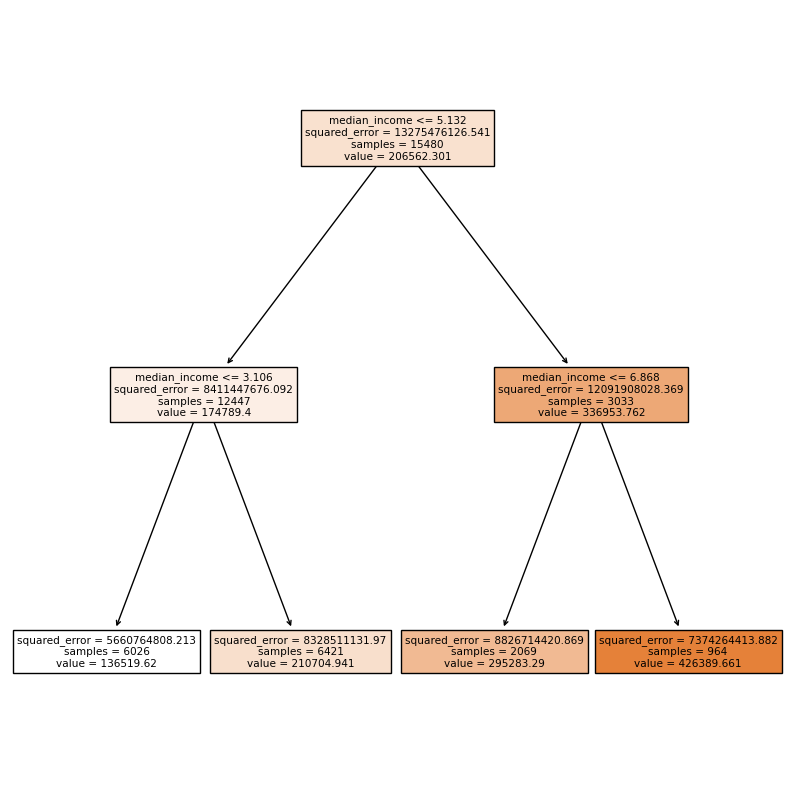

In [4]:
# Visualizando a arvore com plot_tree
plt.rc('figure', figsize = (10, 10))
tp = tree.plot_tree(regr_1,
                   feature_names = X.columns,
                   filled = True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [5]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.30199872e+08, 1.10517768e+09, 4.14291500e+09]),
 'impurities': array([7.29718358e+09, 8.02738345e+09, 9.13256113e+09, 1.32754761e+10])}

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [6]:
# Criando variaveis com o path criado
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Criando um novo modelo com o Alpha coletado
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

Text(0, 0.5, 'Profundidade da árvore')

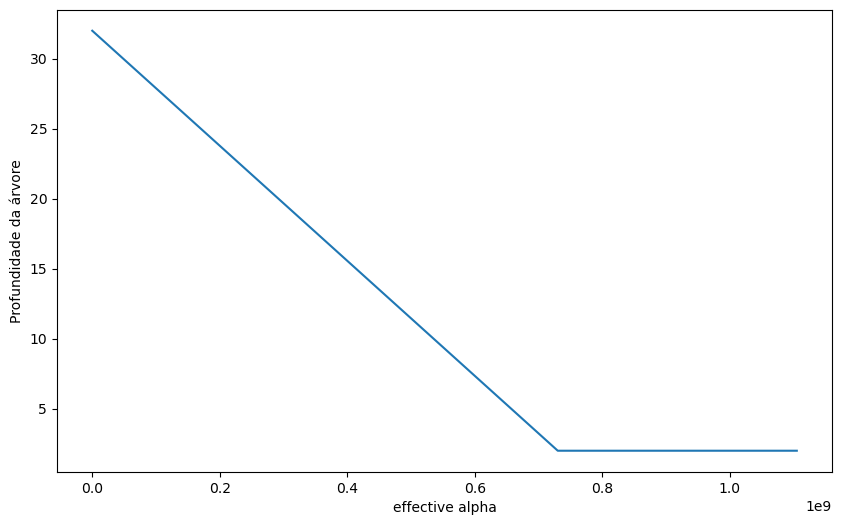

In [7]:
# Plotando

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

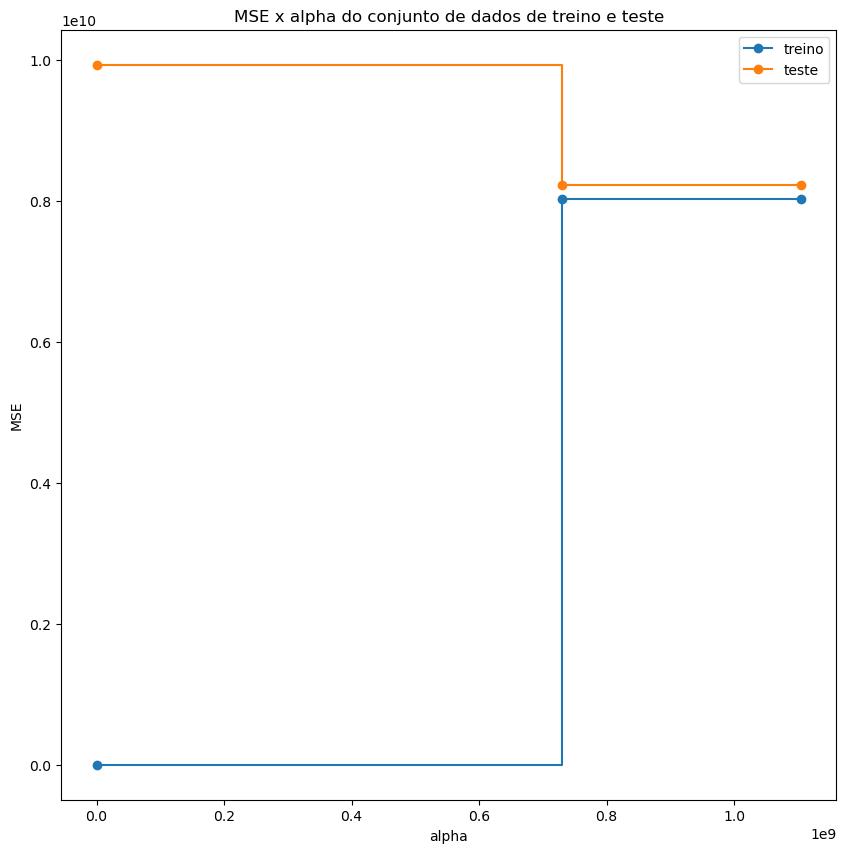

In [8]:
# Treinando e testando o modelo com o MSE mais o clf coletado
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

# Plotando
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()

plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [9]:
# Criando a árvore com ccp_alpha = 0.02 (minimo)
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.02)

# Treinando o modelo
arvore_final.fit(X_train, y_train)

# Avaliando a profundidade e o desempenho
print(f'R-quadrado na base de teste: {arvore_final.score(X_test, y_test):.2f}')



R-quadrado na base de teste: 0.26


### 7. Visualize esta árvore.

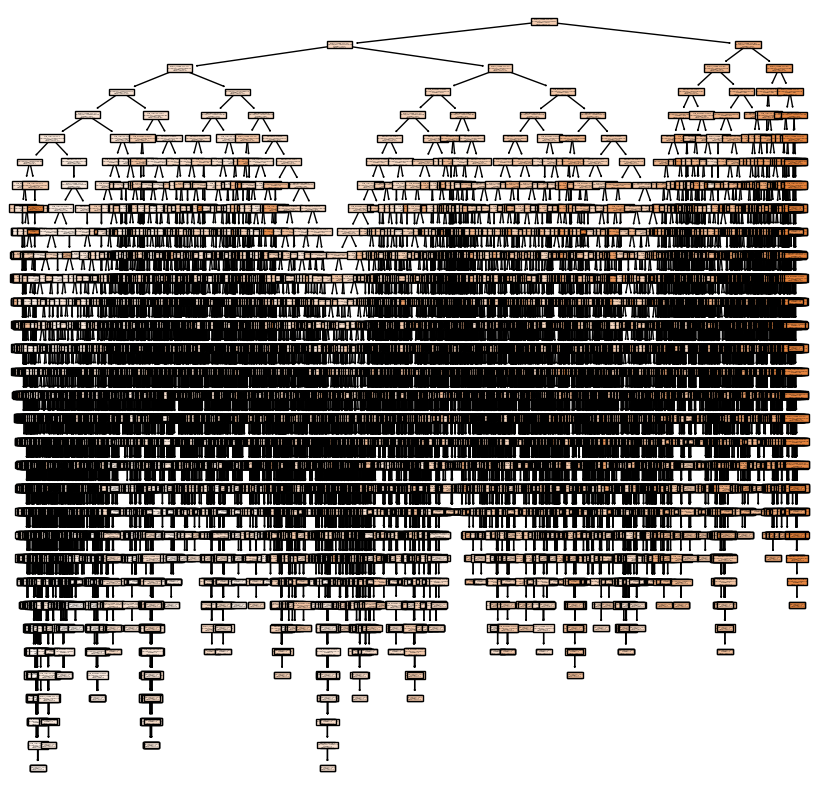

In [10]:
# Visualizando a arvore com plot_tree
plt.rc('figure', figsize = (10, 10))
tp = tree.plot_tree(arvore_final,
                   feature_names = X.columns,
                   filled = True)